**Titanic - Machine Learning from Disaster**

https://www.kaggle.com/c/titanic

**Goals:**

1. How many rows and columns are there?

2. What are the minimum and maximum ages?

3. Describe the strong relationship between survived column and other columns?

4. How many surived people are there?

5. How many are male and female?

6. What is the average age of passengers?

7. What is the most embarked section?

8. What is the age of the majority of passenger?

9. From what fare is deemed as expensive and rare?

10. Since what age is regarded as outlier using z-score?

11. What is the range of fare that is regarded as outlier using z-score?

12. What is the accuracy of Logistic Regression model?

13. What features are the heavy weight to the survival?

**Steps:**

1. Import libraries

2. Load the dataset

3. Check for null values

4. Data visualization

5. Detect and handle outliers using z-score formula

6. Perform encoding

8. Feature scaling

9. Split the data into train and test

10. Conclusion



---



# **0. Import libraries**

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import metrics

# **1. Load the dataset**

In [239]:
# create the dataframe
df = pd.read_csv('/content/drive/MyDrive/1. Data Science/10. Titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [240]:
# check the dimension
df.shape

(891, 12)

*There are 891 rows and 12 columns.*

---



In [241]:
# check the basic statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*The minimum age of passenger is 0.42 year old and the maximum age is 80 years old.*

---



In [242]:
# create the correlation matrix
corr = df.corr()
corr

<ipython-input-242-3429f88b1dbd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


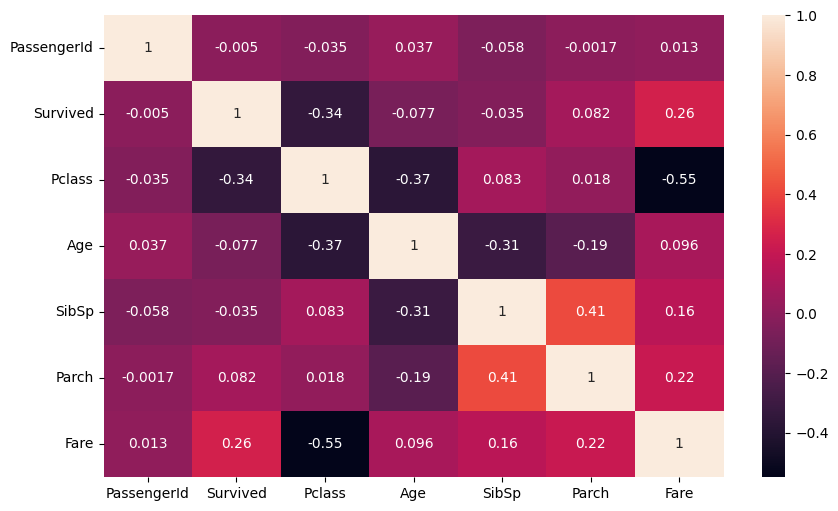

In [243]:
# visualize the correlation matrix in heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.show()

*Survived has a negative relationship with Pclass. This means that passengers who are in the better class tend survive. It also positively relates to the fare which is the higher the fare, the better the class and the higher chance of survival.*

---



In [244]:
# count the survived
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

*There are 342 survived people.*

---



In [245]:
# count the sex
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

*There are 577 males and 314 females.*

---



In [246]:
# count the embarked
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# **3. Check for null values**

In [247]:
# check if there are NaN values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*There are 177 age values, 687 cabin values and 2 embarked values.*

---



In [248]:
# check the age column
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [249]:
# fill the NaN in the age column with its own mean
mean_age = df['Age'].mean()
mean_age

29.69911764705882

*The mean age of passengers (not including NaN values) is 29.69911764705882. So we will fill this number in NaN rows of the age column.*

---



In [250]:
# # fill the NaN in the age column with its own mean
df['Age'].fillna(mean_age, inplace=True)

In [251]:
# check for the NaN values again
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [252]:
# fill the NaN in the embarked column with its own mode (most frequent data)
most_common_embarked = df['Embarked'].mode()[0]
most_common_embarked

'S'

*The most frequent embarked section is 'S'. So we will fill this one in NaN rows of the embarked column.*

---



In [253]:
# fill the NaN in the embarked column with its own mode (most frequent data)
df['Embarked'].fillna(most_common_embarked, inplace=True)

In [254]:
# check for the NaN values again
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [255]:
# drop some columns that we will not use
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [256]:
# show dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


# **4. Data visualization**

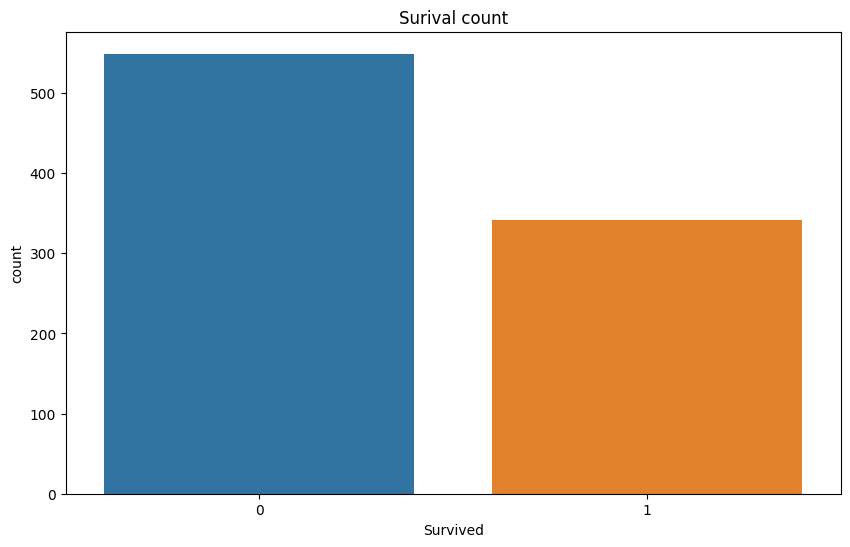

In [257]:
# plot the count of the survived (1) and not survived (0)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Survived')
plt.title('Surival count')
plt.show()

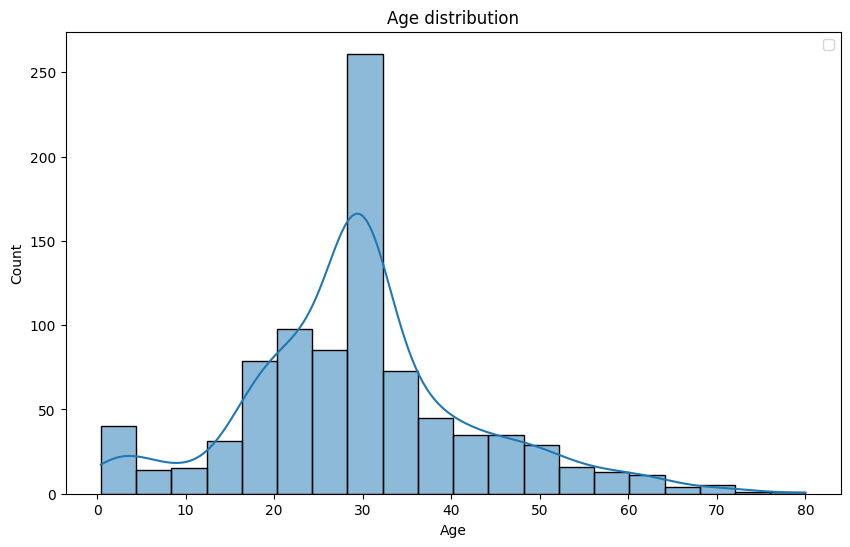

In [258]:
# plot the distribution of the age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age distribution')
plt.legend()

*The majority of passenger has the age of nearly 30.*

---



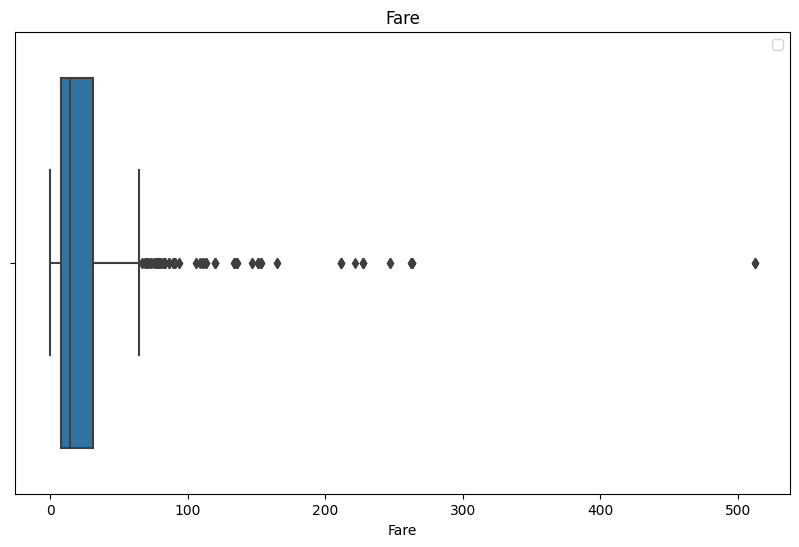

In [259]:
# show the boxplot of the fare column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Fare')
plt.title('Fare')
plt.legend()

*The expensive and rare fare is from around 70.*

---



# **5. Dectect and handle outliers using Z-Score formula**

In [260]:
# find the z-score of the age column
z_scores = np.abs(stats.zscore(df['Age']))

# set the maximum threshold
max_threshold = 3

In [261]:
# show the outliers
outliers = df['Age'][z_scores > max_threshold]
print('Outliers detected using z-score:')
outliers

Outliers detected using z-score:


96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

*Z-score can detect 7 outliers which are the ages above 70.*

---



In [262]:
# find the z-score of the fare column
z_scores = np.abs(stats.zscore(df['Fare']))

In [263]:
# show the outliers
outliers = df['Fare'][z_scores > max_threshold]
print('Outliers detected by z-score:')
print(f'There are {outliers.count()} outliers.')
print()
outliers.sort_values()

Outliers detected by z-score:
There are 20 outliers.



779    211.3375
730    211.3375
689    211.3375
377    211.5000
527    221.7792
716    227.5250
700    227.5250
380    227.5250
557    227.5250
118    247.5208
299    247.5208
311    262.3750
742    262.3750
27     263.0000
341    263.0000
88     263.0000
438    263.0000
258    512.3292
737    512.3292
679    512.3292
Name: Fare, dtype: float64

*There are 20 outliers in the fare column whose cost is ranging from 211.3375 up to 512.3292.*

---



*Let's clean dataframe by maintaining the age that is between lower bound and upper bound.*

---



In [264]:
# calculate Q1 and Q3
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

# calculate IQR
IQR = Q3 - Q1

# define the lower bound and upper bound
lower_bound = Q1 - IQR
upper_bound = Q3 + IQR

In [265]:
# filter the rows with values outside the IQR bounds (to remove the outliers)
df_cleaned = df[(df['Age'] > lower_bound) & (df['Age'] < upper_bound)]
df_cleaned

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


*Here we got a new dataframe whose outliers have been removed using IQR.*

---



In [266]:
# check the dimension of a new dataframe
df_cleaned.shape

(740, 9)

*We have 740 rows left.*

---



In [267]:
# let x be the dataframe that excludes Survived column (feature)
# let y be the dataframe that only has Survived column (target)
x = df_cleaned.drop(columns = ['Survived'])
y = df_cleaned['Survived']

In [268]:
# check x
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [269]:
# check y
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 740, dtype: int64

# **6. Perform encoding**

In [270]:
# initialize an instance
en = LabelEncoder()

In [271]:
# convert every row in Sex column to 1 for male and 0 for female
x['Sex'] = en.fit_transform(x['Sex'])

In [272]:
# check the x dataframe
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,S
1,2,1,0,38.0,1,0,71.2833,C
2,3,3,0,26.0,0,0,7.9250,S
3,4,1,0,35.0,1,0,53.1000,S
4,5,3,1,35.0,0,0,8.0500,S


In [273]:
# convert a categorical variable into a format for ML
x = pd.get_dummies(x, columns=['Embarked'])

In [274]:
# check x dataframe
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,0,38.0,1,0,71.2833,1,0,0
2,3,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,0,35.0,1,0,53.1000,0,0,1
4,5,3,1,35.0,0,0,8.0500,0,0,1


# **8. Feature scaling**

In [275]:
# initialize an instance to remove the mean and scaling to unit variance
scale = StandardScaler()

In [276]:
# standardize the data z = (x - u) / s
x[['Age', 'Fare']] = scale.fit_transform(x[['Age', 'Fare']])

In [277]:
# check the x dataframe
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,-0.881045,1,0,-0.455946,0,0,1
1,2,1,0,1.228583,1,0,0.792773,1,0,0
2,3,3,0,-0.353638,0,0,-0.442783,0,0,1
3,4,1,0,0.833028,1,0,0.438178,0,0,1
4,5,3,1,0.833028,0,0,-0.440345,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,-0.221786,0,0,-0.343815,0,0,1
887,888,1,0,-1.276600,0,0,-0.012297,0,0,1
888,889,3,0,0.134097,1,2,-0.140029,0,0,1
889,890,1,1,-0.353638,0,0,-0.012297,1,0,0


# **9. Split the data into train and set**

In [278]:
# x = feature
# y = target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [279]:
# show the dimension of the train and test
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

x_train: (592, 10)
x_test: (148, 10)
y_train: (592,)
y_test: (148,)


*We will use the Logistic Regression model to train the dataset.*

---



In [280]:
# initialize the model
lm = LogisticRegression()

In [281]:
# fit the model according to the given dataset
lm.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [282]:
# show intercept
print(lm.intercept_)

[2.50611141]


*When x = 0, the line crosses y at 2.50609985.*

---



In [283]:
# predict using the test data
predictions = lm.predict(x_test)
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

*The above array (predicted labels) is predicted whether it is 1 (survived) or 0 (not survived). Let's see if it is accurate or not to the acutal data.*

---



In [284]:
# evaluate the accuracy
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8648648648648649


*Logistic Regression got the answer right 86.48%.*

---



In [285]:
# show the coefficient of the logistic regression model
lm_coef = lm.coef_
lm_coef

array([[-6.04224067e-05, -8.62850744e-01, -2.59585090e+00,
        -1.25225230e-01, -1.86133612e-01, -1.82241075e-01,
         7.40973169e-02,  1.15386670e+00,  5.52157466e-01,
         5.91290186e-01]])

In [286]:
# reshape the coefficient array
lm_coef_reshaped = np.reshape(lm_coef, (10, 1))
lm_coef_reshaped

array([[-6.04224067e-05],
       [-8.62850744e-01],
       [-2.59585090e+00],
       [-1.25225230e-01],
       [-1.86133612e-01],
       [-1.82241075e-01],
       [ 7.40973169e-02],
       [ 1.15386670e+00],
       [ 5.52157466e-01],
       [ 5.91290186e-01]])

In [287]:
# create a dataframe of coefficients and features
coeff_df = pd.DataFrame(lm_coef_reshaped, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
PassengerId,-0.000060
Pclass,-0.862851
Sex,-2.595851
Age,-0.125225
SibSp,-0.186134
Parch,-0.182241
Fare,0.074097
Embarked_C,1.153867
Embarked_Q,0.552157
Embarked_S,0.591290


*The tendancy of survival has been heavily weighted by Pclass, Sex and Embarked_C. It means that passengers who stay in better class, Female (0) and people who embark on c tend tend to survive more.*

---



In [288]:
# evaluate the accuracy using MAE, MSE and RMSE metrics
print(f'MAE: {metrics.mean_absolute_error(y_test, predictions)}')
print(f'MSE: {metrics.mean_squared_error(y_test, predictions)}')
print(f'RMSE: {np.sqrt(metrics.mean_absolute_error(y_test, predictions))}')

MAE: 0.13513513513513514
MSE: 0.13513513513513514
RMSE: 0.36760731104690386


# **10. Conclusion**

1. There are 891 rows and 12 columns.

2. The minimum age of passenger is 0.42 year old and the maximum age is 80 years old.

3. Survived has a negative relationship with Pclass. This means that passengers who are in the better class tend survive. It also positively relates to the fare which is the higher the fare, the better the class and the higher chance of survival.

4. There are 342 survived people.

5. There are 577 males and 314 females.

6. The mean age of passengers (not including NaN values) is 29.69911764705882. So we will fill this number in NaN rows of the age column.

7. The most frequent embarked section is 'S'. So we will fill this one in NaN rows of the embarked column.

8. The majority of passenger has the age of nearly 30.

9. The expensive and rare fare is from around 70.

10. Z-score can detect 7 outliers which are the ages above 70.

11. There are 20 outliers in the fare column whose cost is ranging from 211.3375 up to 512.3292.

12. Logistic Regression got the answer right 86.48%.

13. The tendancy of survival has been heavily weighted by Pclass, Sex and Embarked_C. It means that passengers who stay in better class, Female (0) and people who embark on c tend tend to survive more.